In [1]:
from wawi.io import import_folder
import numpy as np
from wawi.model import Windstate
import matplotlib.pyplot as plt

In [2]:
# Import model
model = import_folder('./model')
model.modal_dry.xi0 = .5e-2

Valid pontoon data not found. No pontoons created.
Valid pontoon types file not found. No pontoon_types definitions applied.
Specified drag_elements file found or invalid. No drag elements defined.


In [3]:
# Define windstate and plot model
V0 = 40.0
model.aero.windstate = Windstate(V0, 
                                 45, 
                                 Iu=2.0/V0, 
                                 Iw=1.0/V0, 
                                 Au=30, Aw=3, 
                                 Cuy=10.0, Cwy=8.0,
                                 Cuz=10.0, Cwz=8.0,
                                 Lux=60, Lwx=60,
                                 x_ref=[0,0,0], rho=1.25)

model.n_modes = 50

# model.plot()

In [4]:
# Run eigenvalue solution and plot resulting first mode
model.run_eig()

mode = 1
model.plot_mode(mode, use_dry=False, title=f'Mode {mode+1}: {model.results.xi[mode]*100:.4f}%')

In [7]:
# Run frequency-domain analysis
omega = np.linspace(0.00001, 6, 1000)
model.run_freqsim(omega,
                  include_selfexcited=['aero'], 
                  include_action=['aero'],
                  print_progress=False, merge_aero_sections=False)


Local nodal csys is strictly not possible - averaging introduced (use with care).


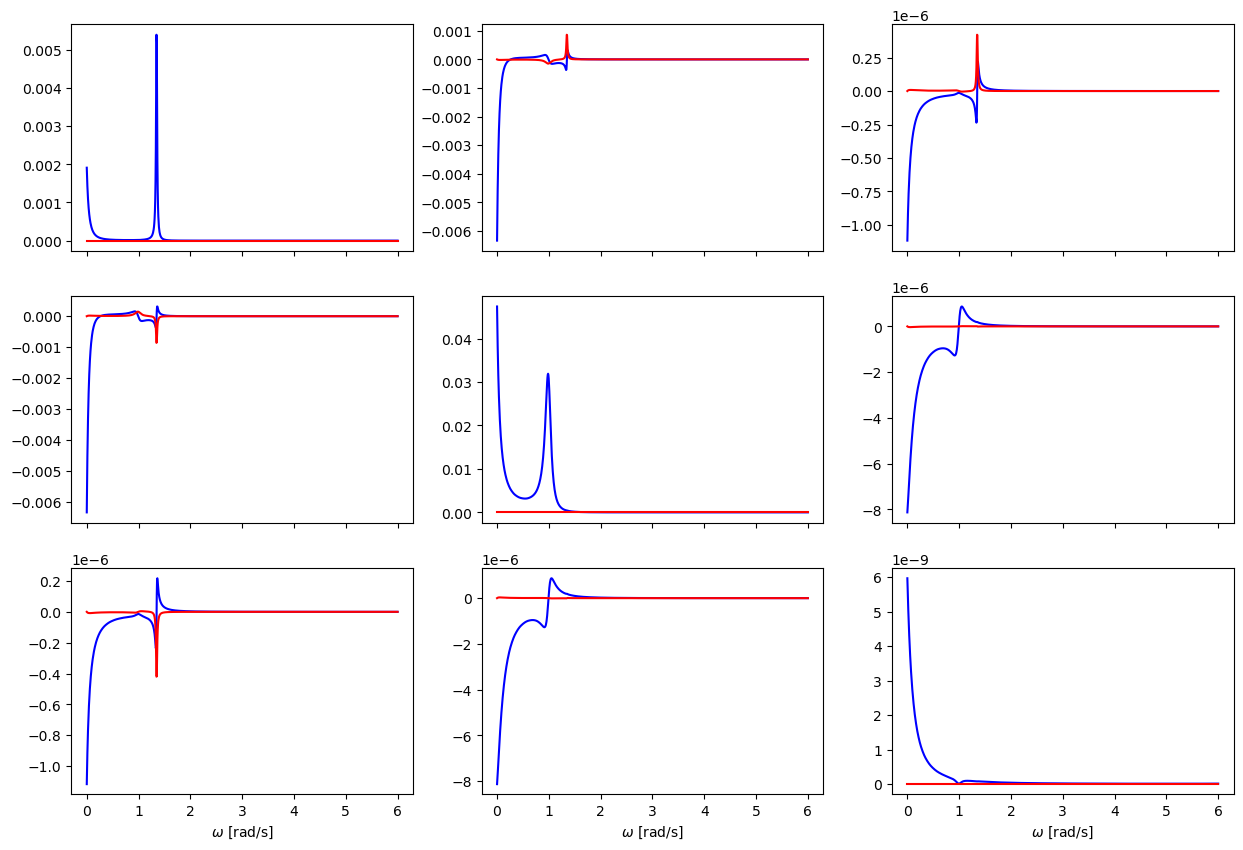

In [8]:
# Output physical CPSD
plot_dofs = np.array([1,2,3])
node_ix = 50
global_dof_ix = node_ix*6+plot_dofs

S = model.get_result_psd(key='full', 
                         index=global_dof_ix,
                         convert_to='local')

fig,ax = plt.subplots(nrows=S.shape[0], ncols=S.shape[1], figsize=(15,10), sharex=True)
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        ax[i,j].plot(model.results.omega, S[i,j,:].real, color='blue')
        ax[i,j].plot(model.results.omega, S[i,j,:].imag, color='red')
    
    ax[-1,i].set_xlabel('$\omega$ [rad/s]')